In [3]:
!pip3 install --upgrade Pillow
!pip3 install tesseract-ocr
!pip3 install numpy
!pip3 install tqdm
!pip3 install os
!pip3 install codecs
!pip3 install pytesseract
!pip3 install opencv-python
!pip3 install pandas 

Requirement already up-to-date: Pillow in /usr/local/lib/python3.6/dist-packages
  Using cached https://files.pythonhosted.org/packages/e2/0d/dcee3dd0fc4c7bcd18125a98f8ba6d9db7aecaa40770595203e312649587/tesseract-ocr-0.0.1.tar.gz
  Running setup.py bdist_wheel for tesseract-ocr ... error
  Complete output from command /usr/bin/python3 -u -c "import setuptools, tokenize;__file__='/tmp/pip-build-3psnupn1/tesseract-ocr/setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" bdist_wheel -d /tmp/tmp6rozaviopip-wheel- --python-tag cp36:
  running bdist_wheel
  running build
  running build_py
  file tesseract_ocr.py (for module tesseract_ocr) not found
  file tesseract_ocr.py (for module tesseract_ocr) not found
  running build_ext
  building 'tesseract_ocr' extension
  creating build
  creating build/temp.linux-x86_64-3.6
  x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-stron

In [4]:

from PIL import Image, ImageDraw, ImageFont
import pytesseract
import cv2
import os
import codecs
from tqdm import tqdm
import numpy as np
import sys
import json
from decimal import *
import pandas as pd

## form Tesseract to vgg 

In [ ]:
ls /mekeneocr/computer-vision-ocr/annotations

In [ ]:
#set the folders and files paths to avoid heavy calls in the functions
vgg = "/mekeneocr/computer-vision-ocr/vgg/vgg.txt"                         #file containing vgg annotations 
annotations = "/mekeneocr/computer-vision-ocr/annotations/annotations.txt" #file containing images annotations 


def convert_tesseract_to_vgg(annotations, vgg, encoding = 'latin1'):
    ''' This will help in converting from tesseract annotation to vgg annotation. 
        The target format is: Anesthetist.png,1076,"{}",11,1,"{""name"":""rect"",""x"":10,""y"":8,""width"":17,""height"":22}","{""name"":""A""}" 
        The source format is: Anesthetist.png A 10 8 17 22 0'''
    
    # holds all the lines for a word, one line for each character
    lines = ""
    title = ""
    
    #number of letters in the word
    letter_counter = 1
    
    #number of exceptions
    error_counter = 0
    outputfile = codecs.open(vgg, 'w', encoding = 'utf-8') #write file that will contain the vgg annotations 
    errorfile = codecs.open('errors_in_to_vgg.txt', 'w', encoding = 'utf-8') #file that will contain errors in case
    
    # header for the file
    title_words = ['filename',
                   'file_size',
                   'file_attributes',
                   'region_count',
                   'region_id',
                   'region_shape_attributes',
                   'region_attributes']
    
    for word in title_words:
        title = title + word + ','
    title = title + '\n'    
    outputfile.write(title)
    
    for each_line in open(annotations, "r", encoding =  'utf-8'):
        try:        
            if (each_line == "\n"):      #If empty line, then new word begining and write the previous word to file
                if len(lines) > 0:
                    lines = lines.replace("$", str(letter_counter-1)) # $ is the place holder for number of letters
                    letter_counter = 1               # reset letter counter
                    outputfile.write(lines)          # write all the lines (one for each letter) 
                    outputfile.write("\n")           # write new line
                    lines = ""                       # reset the lines for next word to empty
            else:
                # single word file name
                if len(each_line.split(' '))  == 7:
                    filename, letter, x, y, width, height, _ = each_line.split(' ') # not working for multiline words
                    
                #double word filen name
                elif len(each_line.split(' ')) == 8:
                    filenamew1, filenamew2, letter, x, y, width, height, _ = each_line.split(' ')
                    filename = filenamew1 + ' ' + filenamew2
                    
                #three words file name
                elif len(each_line.split(' ')) == 9:
                    filenamew1, filenamew2, filenamew3, letter, x, y, width, height, _ = each_line.split(' ')
                    filename = filenamew1 + ' ' + filenamew2 + ' ' + filenamew3
                 
                # file size is set to dummy value of 1076
                lines = lines + filename + "," + "1076,\"{}\"," + "$," + str(letter_counter) + "," + "\"{\"\"name\"\":" + "\"\"rect\"\","+ "\"\"x\"\"" + ":" + str(x) + ",\"\"y\"\"" + ":" + str(y) + ",\"\"width\"\"" + ":" + str(width) + ",\"\"height\"\"" + ":" + str(height) + "}\",\"{\"\"name\"\":" + "\"\"" + str(letter) + "\"\"}\"" +"\n"
                letter_counter = letter_counter + 1
                
        except Exception as runtime_except:        #in case of errors 
            print(each_line)
            errorfile.write(each_line)            
            print('error in converting to vgg for line:', each_line)
            error_counter = error_counter + 1
            print(runtime_except)
            pass
        
    errorfile.close()
    return(error_counter)

In [ ]:
def main():
    convert_tesseract_to_vgg(annotations, vgg, encoding = 'latin1')
    
if __name__ == "__main__":
    main()

## converting the vgg.txt file in to .csv

In [ ]:


read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg2/vgg2.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg2/vgg2.csv", index=None)

In [13]:
import os

In [ ]:
image_files_path = "/mekeneocr/computer-vision-ocr/yolo/"

## Subdividing the whole set of images into 10 and generate for each of them its vgg from the whole vgg and then its yolo 

In [5]:
liste_vide = []
with open(r"/mekeneocr/computer-vision-ocr/vgg/vgg.txt", "r", encoding='utf-8') as f1:
    liste_vide = f1.readlines()
    

In [6]:
liste_vide[:5]

['filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,\n',
 'Mekinist.png,1076,"{}",8,1,"{""name"":""rect"",""x"":11,""y"":8,""width"":17,""height"":22}","{""name"":""M""}"\n',
 'Mekinist.png,1076,"{}",8,2,"{""name"":""rect"",""x"":17,""y"":8,""width"":25,""height"":22}","{""name"":""e""}"\n',
 'Mekinist.png,1076,"{}",8,3,"{""name"":""rect"",""x"":28,""y"":8,""width"":37,""height"":18}","{""name"":""k""}"\n',
 'Mekinist.png,1076,"{}",8,4,"{""name"":""rect"",""x"":39,""y"":8,""width"":46,""height"":22}","{""name"":""i""}"\n']

In [7]:
all_png_files = [el.split(",")[0] for el in liste_vide if el.split(",")[0].endswith(".png")]
liste_all_png_files = list(set(all_png_files))

In [8]:
all_png_files[:10]

['Mekinist.png',
 'Mekinist.png',
 'Mekinist.png',
 'Mekinist.png',
 'Mekinist.png',
 'Mekinist.png',
 'Mekinist.png',
 'Mekinist.png',
 'Morpheus.png',
 'Morpheus.png']

In [10]:
len(liste_all_png_files)

56844

In [28]:
liste_all_png_files[:10]

['FocalSeal.png',
 'antidepressive.png',
 'choleperitonitis.png',
 'hypersplenia.png',
 'aorta.png',
 'grid.png',
 'hypnogenic.png',
 'Clagett.png',
 'dequalinium.png',
 'acustica.png']

In [11]:
path_images = "/mekeneocr/computer-vision-ocr/images"

In [14]:
liste_all_png_files_ = [os.path.join(path_images, el) for el in liste_all_png_files]

In [26]:
groupe1 = liste_all_png_files_[:5000]
groupe2= liste_all_png_files_[5001:10000]
groupe3= liste_all_png_files_[10001:15000]
groupe4= liste_all_png_files_[15001:20000]
groupe5= liste_all_png_files_[20001:25000]
groupe6= liste_all_png_files_[25001:30000]
groupe7= liste_all_png_files_[30001:35000]
groupe8= liste_all_png_files_[35001:40000]
groupe9= liste_all_png_files_[40001:45000]
groupe10= liste_all_png_files_[45001:50000]


In [16]:
import shutil

In [ ]:
images_groupe1 = "/mekeneocr/computer-vision-ocr/images_groupe1"
for thing in groupe1:
    try:
        
        shutil.copy(thing, images_groupe1)
    except FileNotFoundError:
        print(thing)

In [ ]:
images_groupe2 = "/mekeneocr/computer-vision-ocr/images_groupe2"
for thing in groupe2:
    try:
        
        shutil.copy(thing, images_groupe2)
    except FileNotFoundError:
        print(thing)

In [18]:
import pickle 

In [ ]:
with open("/mekeneocr/computer-vision-ocr/groupe3.pkl",'wb') as outfile:

    pickle.dump(groupe3, outfile)

In [189]:
with open("/mekeneocr/computer-vision-ocr/groupe2.pkl",'wb') as outfile:

    pickle.dump(groupe2, outfile)

In [190]:
with open("/mekeneocr/computer-vision-ocr/groupe1.pkl",'wb') as outfile:

    pickle.dump(groupe1, outfile)

In [65]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()

In [66]:
Lines[:5]

['filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,\n',
 'Mekinist.png,1076,"{}",8,1,"{""name"":""rect"",""x"":11,""y"":8,""width"":17,""height"":22}","{""name"":""M""}"\n',
 'Mekinist.png,1076,"{}",8,2,"{""name"":""rect"",""x"":17,""y"":8,""width"":25,""height"":22}","{""name"":""e""}"\n',
 'Mekinist.png,1076,"{}",8,3,"{""name"":""rect"",""x"":28,""y"":8,""width"":37,""height"":18}","{""name"":""k""}"\n',
 'Mekinist.png,1076,"{}",8,4,"{""name"":""rect"",""x"":39,""y"":8,""width"":46,""height"":22}","{""name"":""i""}"\n']

In [67]:
with open("/mekeneocr/computer-vision-ocr/groupe10.pkl",'rb')  as infile:
    Picks = pickle.load(infile)

In [72]:
Picks[:5]

['/mekeneocr/computer-vision-ocr/images/endotheliosis.png',
 '/mekeneocr/computer-vision-ocr/images/colloides.png',
 '/mekeneocr/computer-vision-ocr/images/ethmosphenoid.png',
 '/mekeneocr/computer-vision-ocr/images/Dengue.png',
 '/mekeneocr/computer-vision-ocr/images/apperceive.png']

In [69]:
import tqdm  

In [77]:

with open("/mekeneocr/computer-vision-ocr/vgg10.txt",'w', encoding = 'utf-8') as f2:
    for thing in tqdm.tqdm(Lines):
        if os.path.join('/mekeneocr/computer-vision-ocr/images', thing.split(',')[0]) in Picks:
            #print(thing)
            #break 
            f2.write(thing)

100%|██████████| 623999/623999 [00:51<00:00, 12178.82it/s]


In [78]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg10.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg10.csv", index=None)

In [174]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe9.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg9.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:45<00:00, 13713.11it/s]


In [175]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg9.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg9.csv", index=None)

In [176]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe8.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg8.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:48<00:00, 12978.10it/s]


In [178]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg8.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg8.csv", index=None)

In [179]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe7.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg7.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:43<00:00, 14321.67it/s]


In [180]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg7.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg7.csv", index=None)

In [181]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe6.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg6.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:45<00:00, 13619.15it/s]


In [182]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg6.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg6.csv", index=None)

In [183]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe5.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg5.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:50<00:00, 12295.55it/s]


In [184]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg5.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg5.csv", index=None)

In [185]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe4.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg4.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:50<00:00, 12467.94it/s]


In [186]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg4.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg4.csv", index=None)

In [187]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe3.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg3.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:57<00:00, 10903.14it/s]


In [188]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg3.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg3.csv", index=None)

In [191]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe2.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg2.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:46<00:00, 13278.99it/s]


In [192]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg2.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg2.csv", index=None)

In [193]:
with open("/mekeneocr/computer-vision-ocr/vgg/vgg.txt",'r', encoding = 'utf-8') as f1:
    Lines = f1.readlines()
    with open("/mekeneocr/computer-vision-ocr/groupe1.pkl",'rb')  as infile:
        Picks = pickle.load(infile)
        with open("/mekeneocr/computer-vision-ocr/vgg1.txt",'w', encoding = 'utf-8') as f2:
            for thing in tqdm.tqdm(Lines):
                if os.path.join('/mekeneocr/computer-vision-ocr/images/', thing.split(',')[0]) in Picks:
                    f2.write(thing)
        

100%|██████████| 623999/623999 [00:51<00:00, 12033.86it/s]


In [194]:
#convert vgg.txt to vgg.csv
read_file = pd.read_csv (r"/mekeneocr/computer-vision-ocr/vgg1.txt")
read_file.to_csv (r"/mekeneocr/computer-vision-ocr/vgg1.csv", index=None)

In [ ]:
images_groupe3 = "/mekeneocr/computer-vision-ocr/images_groupe3"
for thing in groupe3:
    try:
        
        shutil.copy(thing, images_groupe3)
    except FileNotFoundError:
        print(thing)

In [19]:
with open("/mekeneocr/computer-vision-ocr/groupe4.pkl",'wb') as outfile:

    pickle.dump(groupe4, outfile)

In [1]:
images_groupe4 = "/mekeneocr/computer-vision-ocr/images_groupe4"
for thing in groupe4:
    try:
        
        shutil.copy(thing, images_groupe4)
    except FileNotFoundError:
        print(thing)

NameError: name 'groupe4' is not defined

In [20]:
with open("/mekeneocr/computer-vision-ocr/groupe5.pkl",'wb') as outfile:

    pickle.dump(groupe5, outfile)

In [ ]:
images_groupe5 = "/mekeneocr/computer-vision-ocr/images_groupe5"
for thing in groupe5:
    try:
        
        shutil.copy(thing, images_groupe5)
    except FileNotFoundError:
        print(thing)

In [21]:
with open("/mekeneocr/computer-vision-ocr/groupe6.pkl",'wb') as outfile:

    pickle.dump(groupe6, outfile)

In [ ]:
images_groupe6 = "/mekeneocr/computer-vision-ocr/images_groupe6"
for thing in groupe6:
    try:
        
        shutil.copy(thing, images_groupe6)
    except FileNotFoundError:
        print(thing)

In [22]:
with open("/mekeneocr/computer-vision-ocr/groupe7.pkl",'wb') as outfile:

    pickle.dump(groupe7, outfile)

In [ ]:
images_groupe7 = "/mekeneocr/computer-vision-ocr/images_groupe7"
for thing in groupe7:
    try:
        
        shutil.copy(thing, images_groupe7)
    except FileNotFoundError:
        print(thing)

In [23]:
with open("/mekeneocr/computer-vision-ocr/groupe8.pkl",'wb') as outfile:

    pickle.dump(groupe8, outfile)

In [ ]:
images_groupe8 = "/mekeneocr/computer-vision-ocr/images_groupe8"
for thing in groupe8:
    try:
        
        shutil.copy(thing, images_groupe8)
    except FileNotFoundError:
        print(thing)

In [24]:
with open("/mekeneocr/computer-vision-ocr/groupe9.pkl",'wb') as outfile:

    pickle.dump(groupe9, outfile)

In [25]:
with open("/mekeneocr/computer-vision-ocr/groupe10.pkl",'wb') as outfile:

    pickle.dump(groupe10, outfile)

In [ ]:
import multiprocessing 

In [ ]:
images_groupe2 = "/mekeneocr/computer-vision-ocr/images_groupe2"
def smart_copy(x):
    global images_groupe2
    
    try:
        
        shutil.copy(x, images_groupe2)
    except FileNotFoundError:
        print(x)
    

In [ ]:
n_proc = multiprocessing.cpu_count()
pool2 = multiprocessing.Pool(n_proc)
res = [pool2.imap(smart_copy, images_groupe2)]
#pool2.map(smart_copy, images_groupe2)

In [ ]:
groupe1

In [ ]:
liste_all_png_files_full = [os.path.join("/mekeneocr/computer-vision-ocr/images/", el) for el in liste_all_png_files ]

In [ ]:
os.path.exists('/mekeneocr/computer-vision-ocr/images/vigor.png')

In [ ]:
import glob2

In [ ]:
toutes_les_images = glob2.glob("/mekeneocr/computer-vision-ocr/images/*")

In [ ]:
len(toutes_les_images)

In [ ]:
toutes_les_images[0]

In [ ]:
for my_file in toutes_les_images:
    if my_file not in (liste_all_png_files_full):
        os.remove(my_file)
        print(my_file)

In [ ]:
ls /mekeneocr/computer-vision-ocr/images | wc -l 

In [ ]:
read_vgg = []
with open("/mekeneocr/computer-vision-ocr/vgg2/vgg.txt", "r", encoding = "utf-8") as f:
    read_vgg = f.readlines()
    

In [ ]:
[el for el in read_vgg if "chafe.png" in el]

## Converting to yolo format

In [6]:
#set the folders and files paths to avoid heavy calls in the functions
vgg_csv = "vgg8.csv"
vgg_csv_path = "/mekeneocr/computer-vision-ocr/"
vgg2 = vgg_csv_path + vgg_csv



#this is our dictionnary: to each alphabetic character including "-"" and "_" we assign a number 
letter_to_class_map = thisdict = {
  "a": "0",
  "b": "1",
  "c": "2",
  "d": "3",
  "e": "4",
  "f": "5",
  "g": "6",
  "h": "7",
  "i": "8",
  "j": "9",
  "k": "10",
  "l": "11",
  "m": "12",
  "n": "13",
  "o": "14",
  "p": "15",
  "q": "16",
  "r": "17",
  "s": "18",
  "t": "19",
  "u": "20",
  "v": "21",
  "w": "22",
  "x": "23",
  "y": "24",
  "z": "25",
  "-": "26",
  "A": "27",
  "B": "28",
  "C": "29",
  "D": "30",
  "E": "31",
  "F": "32",
  "G": "33",
  "H": "34",
  "I": "35",
  "J": "36",
  "K": "37",
  "L": "38",
  "M": "39",
  "N": "40",
  "O": "41",
  "P": "42",
  "Q": "43",
  "R": "44",
  "S": "45",
  "T": "46",
  "U": "47",
  "V": "48",
  "W": "49",
  "X": "50",
  "Y": "51",
  "Z": "52",
  "0": "53",
  "1": "54",
  "2": "55",
  "3": "56",
  "4": "57",
  "5": "58",
  "6": "59",
  "7": "60",
  "8": "61",
  "9": "62",
  "/": "63",
}


In [7]:
def convert_vgg_yolo(vgg):
    """"This function allows to convert the vgg annotations in the csv file into a txt file following the yolo annotations"""
    #global output_file_
    
    f_vide =[]   #create an empty list
    new_file = True 
    with open(vgg, "r", encoding='utf-8') as f: #read the vgg annotations csv file
        f_vide = f.readlines() #store the lines of vgg.csv to the list
    
    assert len(f_vide) != 0   #check if the list in not empty
    for line in tqdm.tqdm(f_vide):
        
        if (line == "\n"):        #check if the line is empty
            new_file = True       #pass to a new file
            continue;
        elif (line != "\n"):      #check if the line is not empty
            filename = line.split(',')[0]
            my_dir = "/mekeneocr/computer-vision-ocr/images_groupe8/"
            line_path = my_dir + filename   #store paths to line_path
            label = my_dir + filename.split(".")[0] + '.txt'
            if os.path.exists(line_path):        #check if path exists
                with open(label, 'a', encoding = 'utf-8') as f2:


                    x = float(line.split(',')[6].split(":")[1])  #coordinate of x
                    y = float(line.split(',')[7].split(":")[1])  #coordinate of y
                    width = float(line.split(',')[8].split(":")[1])  #value of width 
                    true_width = width - x
                    height = float(line.split(',')[9].split(":")[1].split('}')[0])  #value of height
                    
                    try:

                        assert true_width != 0
                        assert height != 0
                    except:
                        with open ('./error8.txt', 'a', encoding = 'utf-8') as ferror:
                            ferror.write(line_path)
                            ferror.write("\n")
                        continue;
                    
                    try:

                        obj_class = line.split(',')[10].split(":")[1][2]
                        obj_class = letter_to_class_map.get(obj_class)

                        #open the image and get its size
                        img = Image.open(line_path)
                        size = img.size

                        #Re-Dimensioning in order to fit the yolo format
                        _x      = (Decimal(x) + Decimal(true_width/2)) / Decimal(size[0]) # relative position of center x of rect
                        _y      = (Decimal(y) + Decimal(height/2)) / Decimal(size[1]) # relative position of center y of rect
                        _width  = Decimal(true_width / size[0])
                        _height = Decimal(height / size[1])
                    
                    
                        
                    
                        #print(_x + _width/2)
                        #print(_y + _height/2)

                        assert _x <= 1
                        assert _y <= 1
                        #assert _x + _width/2 <= 1.2
                        #assert _y + _height/2 <= 1.2


                        f2.write(str(obj_class) + " " + str(round(_x, 10)) + " " + str(round(_y, 10)) + " " + str(round(_width, 10)) + " " + str(round(_height, 10)))
                        f2.write("\n")
                    except Exception as e:    #in case of error
                        print(line_path)      #print the path where the error occured
                        print(e)              #print the error occured
                        #break 
                
            
                
         

In [206]:
def main():
    convert_vgg_yolo(vgg2)
    
if __name__ == "__main__":
    main()

 88%|████████▊ | 44229/50381 [15:13<03:44, 27.36it/s]

/mekeneocr/computer-vision-ocr/images_groupe8/hertz.png
string index out of range


100%|██████████| 50381/50381 [17:21<00:00, 48.37it/s]


## Reconverting from yolo to vgg because we've found a mistake from the bboxes
### case with aceta.png

In [14]:
fooLine = []
with open('/mekeneocr/computer-vision-ocr/images_groupe10/aceta.txt', 'r', encoding = 'utf-8') as foo:
    fooLine = foo.readlines()

In [40]:
fooLine[0]

'0 0.0900000000 0.4250000000 0.0333333333 0.4500000000\n'

In [21]:
fooLine[0].split(' ')[1]

'0.0900000000'

In [9]:
img = Image.open('/mekeneocr/computer-vision-ocr/images_groupe10/aceta.png')
size = img.size

In [27]:
size[0]

150

In [66]:
magrandeliste= []
for line in fooLine:
    #print(line)
    maliste = []
    theClass =int(line.split(' ')[0])
    theTrueWidth = (float(line.split(' ')[3]) * size[0])
    theTrueHeight = (float(line.split(' ')[4]) * size[1])
    theX = (float(line.split(' ')[1]) * size[0]) - (ourTrueWidth/2)
    theY = (float(line.split(' ')[2]) * size[1]) - (ourHeight/2)
    
    maliste.append(theClass)
    maliste.append(theTrueWidth)
    maliste.append(theTrueHeight)
    maliste.append(theX)
    maliste.append(theY)
    
    magrandeliste.append(maliste)

In [72]:
magrandeliste

[[0, 4.999999995, 18.0, 11.0000000025, 8.0],
 [2, 4.000000005, 18.0, 15.5000000025, 8.0],
 [4, 12.0, 18.0, 29.499999997500005, 8.0],
 [19, 4.000000005, 21.0, 41.499999997500005, 9.5],
 [0, 9.0, 18.0, 51.000000007500006, 8.0]]

In [68]:
from pandas import DataFrame

In [80]:
df = DataFrame (magrandeliste)
#df = df.astype(int)
print(df)

    0     1     2     3    4
0   0   5.0  18.0  11.0  8.0
1   2   4.0  18.0  15.5  8.0
2   4  12.0  18.0  29.5  8.0
3  19   4.0  21.0  41.5  9.5
4   0   9.0  18.0  51.0  8.0


## draw the boxes around aceta

In [ ]:
!pip3 install matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

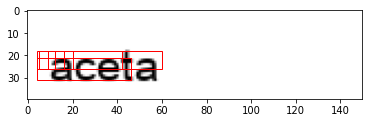

In [82]:

im = np.array(Image.open('/mekeneocr/computer-vision-ocr/images_groupe10/aceta.png'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

# Create a Rectangle patch
rect1 = patches.Rectangle((5,18),11,8,linewidth=1,edgecolor='r',facecolor='none')
rect2 = patches.Rectangle((4,18),16,8,linewidth=1,edgecolor='r',facecolor='none')
rect3 = patches.Rectangle((12,18),30,8,linewidth=1,edgecolor='r',facecolor='none')
rect4 = patches.Rectangle((4,21),42,10,linewidth=1,edgecolor='r',facecolor='none')
rect5 = patches.Rectangle((9,18),51,8,linewidth=1,edgecolor='r',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)
ax.add_patch(rect5)

plt.show()

## for images_groupe9 correct the associated vgg annotatios in order to fit into the vgg annotator 

In [5]:
import os
import pandas as pd 

In [6]:
os.path.getsize('/mekeneocr/computer-vision-ocr/images_groupe9/Extina.png')

1006

In [8]:
meslignes = []
with open('/mekeneocr/computer-vision-ocr/vgg9-for-test.txt', 'r') as f:
    meslignes = f.readlines
    
    

In [9]:
monvgg = pd.read_csv('/mekeneocr/computer-vision-ocr/vgg9-for-test.csv', sep = ',')


In [12]:
monvgg.head()


(49658, 8)

In [17]:
temp = monvgg[["filename"]].drop_duplicates().reset_index(drop = True)

In [18]:
mesimages = '/mekeneocr/computer-vision-ocr/images_groupe9'

In [19]:
def suresh_correct(x):
    mesimages = '/mekeneocr/computer-vision-ocr/images_groupe9'
    myfile = os.path.join(mesimages, x)
    try:
        res = os.path.getsize(myfile)
    except :
        res = 0
    return res

In [20]:
temp["size"] = temp["filename"].apply(lambda x : suresh_correct(x))

In [22]:
temp.head()

,filename,size
0,Extina.png,1006
1,injury.png,896
2,Retinite.png,1031
3,retrobulbaire.png,1549
4,Meningococcal vaccine.png,2290


In [23]:
final = pd.merge(temp, monvgg, on = ['filename'])

In [24]:
final.head()

,filename,size,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes,Unnamed: 7
0,Extina.png,1006,1076,{},6,1,"{""name"":""rect"",""x"":12,""y"":8,""width"":16,""height...","{""name"":""E""}",NaN
1,Extina.png,1006,1076,{},6,2,"{""name"":""rect"",""x"":16,""y"":8,""width"":22,""height...","{""name"":""x""}",NaN
2,Extina.png,1006,1076,{},6,3,"{""name"":""rect"",""x"":25,""y"":8,""width"":33,""height...","{""name"":""t""}",NaN
3,Extina.png,1006,1076,{},6,4,"{""name"":""rect"",""x"":34,""y"":8,""width"":42,""height...","{""name"":""i""}",NaN
4,Extina.png,1006,1076,{},6,5,"{""name"":""rect"",""x"":44,""y"":8,""width"":52,""height...","{""name"":""n""}",NaN


In [27]:
df_vgg = final[["filename","size","file_attributes","region_count","region_id","region_shape_attributes","region_attributes"]]

In [28]:
df_to_be_saved = df_vgg.rename(columns = {'size':'file_size'})

In [29]:
df_to_be_saved.head()

,filename,file_size,file_attributes,region_count,region_id,region_shape_attributes,region_attributes
0,Extina.png,1006,{},6,1,"{""name"":""rect"",""x"":12,""y"":8,""width"":16,""height...","{""name"":""E""}"
1,Extina.png,1006,{},6,2,"{""name"":""rect"",""x"":16,""y"":8,""width"":22,""height...","{""name"":""x""}"
2,Extina.png,1006,{},6,3,"{""name"":""rect"",""x"":25,""y"":8,""width"":33,""height...","{""name"":""t""}"
3,Extina.png,1006,{},6,4,"{""name"":""rect"",""x"":34,""y"":8,""width"":42,""height...","{""name"":""i""}"
4,Extina.png,1006,{},6,5,"{""name"":""rect"",""x"":44,""y"":8,""width"":52,""height...","{""name"":""n""}"


In [30]:
df_to_be_saved.to_csv('/mekeneocr/computer-vision-ocr/clean_vgg9_for_test.csv', sep = ',', index = None)

In [ ]:
ourTrueWidth = (float(fooLine[0].split(' ')[3]) * size[0])
ourTrueWidth

In [33]:
ourHeight = (float(fooLine[0].split(' ')[4]) * size[1])
ourHeight

18.0

In [34]:
ourX = (float(fooLine[0].split(' ')[1]) * size[0]) - (ourTrueWidth/2)
ourX

11.0000000025

In [35]:
ourY = (float(fooLine[0].split(' ')[2]) * size[1]) - (ourHeight/2)
ourY

8.0

In [37]:
print(str(int(fooLine[0].split(' ')[0])) + ' ' + str(ourX) + ' ' + str(ourY) + ' ' + str(ourTrueWidth) + ' ' + str(ourHeight))


0 11.0000000025 8.0 4.999999995 18.0


In [45]:
#fooLine[0]


'0 0.0900000000 0.4250000000 0.0333333333 0.4500000000\n'

In [ ]:
print(str(int(fooLine[1].split(' ')[0]))+' '+